In [ ]:
# ANA TEMA : Erişilebilir ve Temiz Enerji
# Data Seti: Electric_Vehicle_Population_Data

In [9]:
import pandas as pd 
df = pd.read_csv('../data/Electric_Vehicle_Population_Data.csv')
pd.set_option('display.max_columns', None) #Tüm colonları göster
pd.set_option('display.max_rows', None)    #Tüm satırları göster

print(df.head())

   VIN (1-10)     County      City State  Postal Code  Model Year       Make       Model                   Electric Vehicle Type Clean Alternative Fuel Vehicle (CAFV) Eligibility  Electric Range  Base MSRP  Legislative District  DOL Vehicle ID             Vehicle Location        Electric Utility  2020 Census Tract
0  JTMEB3FV6N     Monroe  Key West    FL        33040        2022     TOYOTA  RAV4 PRIME  Plug-in Hybrid Electric Vehicle (PHEV)           Clean Alternative Fuel Vehicle Eligible              42          0                   NaN       198968248    POINT (-81.80023 24.5545)                     NaN        12087972100
1  1G1RD6E45D      Clark  Laughlin    NV        89029        2013  CHEVROLET        VOLT  Plug-in Hybrid Electric Vehicle (PHEV)           Clean Alternative Fuel Vehicle Eligible              38          0                   NaN         5204412  POINT (-114.57245 35.16815)                     NaN        32003005702
2  JN1AZ0CP8B     Yakima    Yakima    WA        9890

In [10]:
df = df[['Model Year', 'Make', 'Model','Electric Vehicle Type', 'Electric Range']]
df.head(20).style.hide(axis='index')

Model Year,Make,Model,Electric Vehicle Type,Electric Range
2022,TOYOTA,RAV4 PRIME,Plug-in Hybrid Electric Vehicle (PHEV),42
2013,CHEVROLET,VOLT,Plug-in Hybrid Electric Vehicle (PHEV),38
2011,NISSAN,LEAF,Battery Electric Vehicle (BEV),73
2017,CHEVROLET,BOLT EV,Battery Electric Vehicle (BEV),238
2019,FORD,FUSION,Plug-in Hybrid Electric Vehicle (PHEV),26
2018,TESLA,MODEL 3,Battery Electric Vehicle (BEV),215
2013,NISSAN,LEAF,Battery Electric Vehicle (BEV),75
2013,NISSAN,LEAF,Battery Electric Vehicle (BEV),75
2016,NISSAN,LEAF,Battery Electric Vehicle (BEV),84
2016,KIA,SOUL,Battery Electric Vehicle (BEV),93


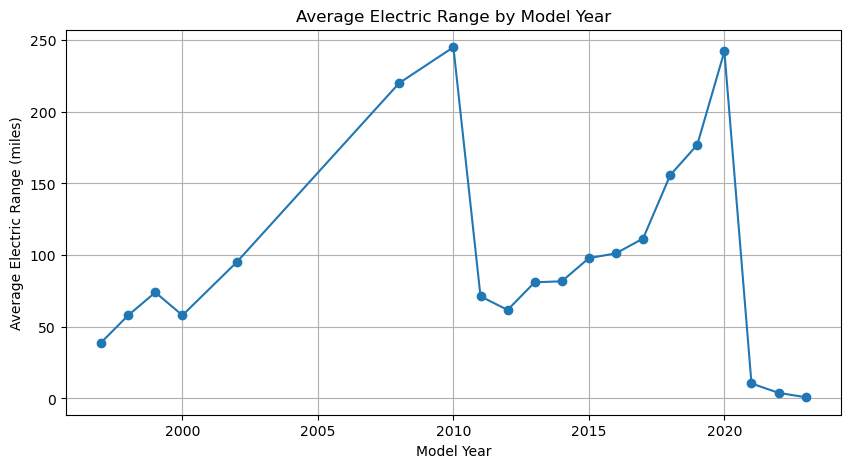

In [3]:
# YILLARA GÖRE ELEKTRİK MENZİL GRAFİĞİ
import matplotlib.pyplot as plt
import pandas as pd
df = pd.read_csv('../data/Electric_Vehicle_Population_Data.csv')


# Amaç:
    #Elektrikli araçların menzilinin (Electric Range) yıllara göre nasıl değiştiğini görmek.
    #Teknolojik ilerlemenin menzile etkisini analiz etmek.

# Yıllara göre ortalama menzil
year_range = df.groupby('Model Year')['Electric Range'].mean()

plt.figure(figsize=(10,5))
plt.plot(year_range.index, year_range.values, marker='o')
plt.xlabel('Model Year')
plt.ylabel('Average Electric Range (miles)')
plt.title("Average Electric Range by Model Year")
plt.grid(True)
plt.show()


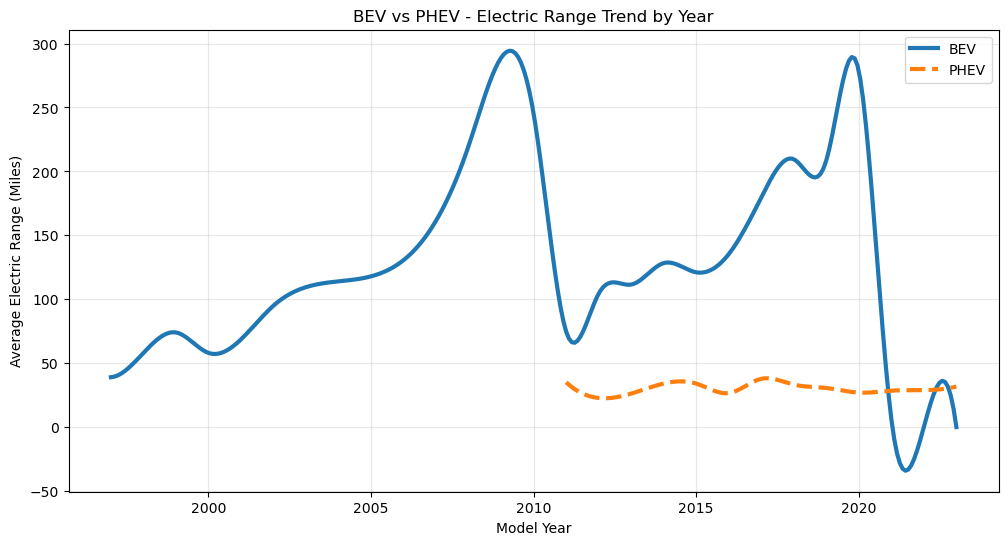

In [4]:
#BEV vs PHEV – Yıllara Göre Ortalama Menzil Karşılaştırması
#AMAÇ:
#Tam elektrikli araçlar (BEV) ile hibrit araçların (PHEV) menzil değişimini karşılaştırmak.

import numpy as np
from scipy.interpolate import make_interp_spline
import pandas as pd
df = pd.read_csv('../data/Electric_Vehicle_Population_Data.csv')

bev = df[df['Electric Vehicle Type'].str.contains("BEV")]
phev = df[df['Electric Vehicle Type'].str.contains("PHEV")]

bev_year = bev.groupby('Model Year')['Electric Range'].mean()
phev_year = phev.groupby('Model Year')['Electric Range'].mean()

x_bev = bev_year.index.values
y_bev = bev_year.values
x_phev = phev_year.index.values
y_phev = phev_year.values

# Yumuşatma
x_bev_smooth = np.linspace(x_bev.min(), x_bev.max(), 300)
y_bev_smooth = make_interp_spline(x_bev, y_bev)(x_bev_smooth)

x_phev_smooth = np.linspace(x_phev.min(), x_phev.max(), 300)
y_phev_smooth = make_interp_spline(x_phev, y_phev)(x_phev_smooth)

plt.figure(figsize=(12,6))
plt.plot(x_bev_smooth, y_bev_smooth, label="BEV", linewidth=3)
plt.plot(x_phev_smooth, y_phev_smooth, label="PHEV", linewidth=3, linestyle='--')

plt.xlabel("Model Year")
plt.ylabel("Average Electric Range (Miles)")
plt.title("BEV vs PHEV - Electric Range Trend by Year")
plt.grid(alpha=0.3)
plt.legend()
plt.show()


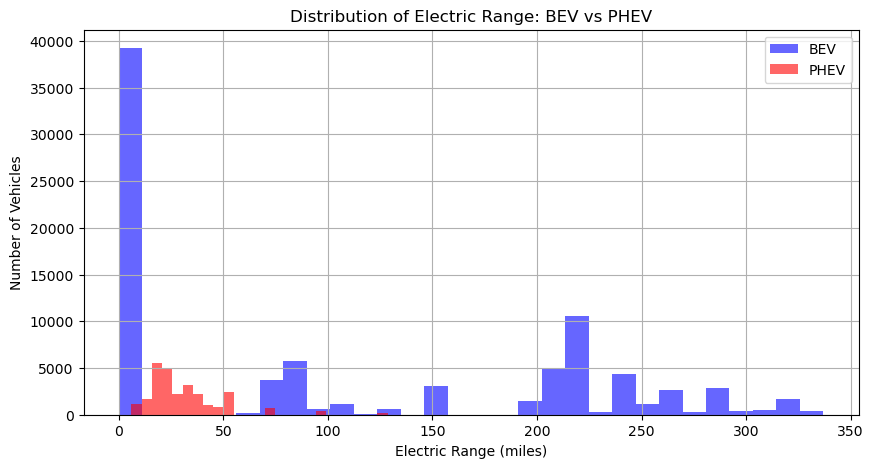

In [5]:
#Electric Range Histogram (BEV – PHEV Dağılımı)
#AMAÇ: Menzil değerlerinin araç türlerine göre nasıl dağıldığını görmek.
bev_range = bev['Electric Range']
phev_range = phev['Electric Range']

plt.figure(figsize=(10,5))

#alpha: saydamlık ayarı
#bins: kaç adet sütun olacağını belirler

plt.hist(bev_range, bins=30, alpha=0.6, label='BEV', color='blue')
plt.hist(phev_range, bins=30, alpha=0.6, label='PHEV', color='red')

plt.xlabel('Electric Range (miles)')
plt.ylabel('Number of Vehicles')
plt.title('Distribution of Electric Range: BEV vs PHEV')
plt.legend() #Etiket kutusu
plt.grid(True)
plt.show()

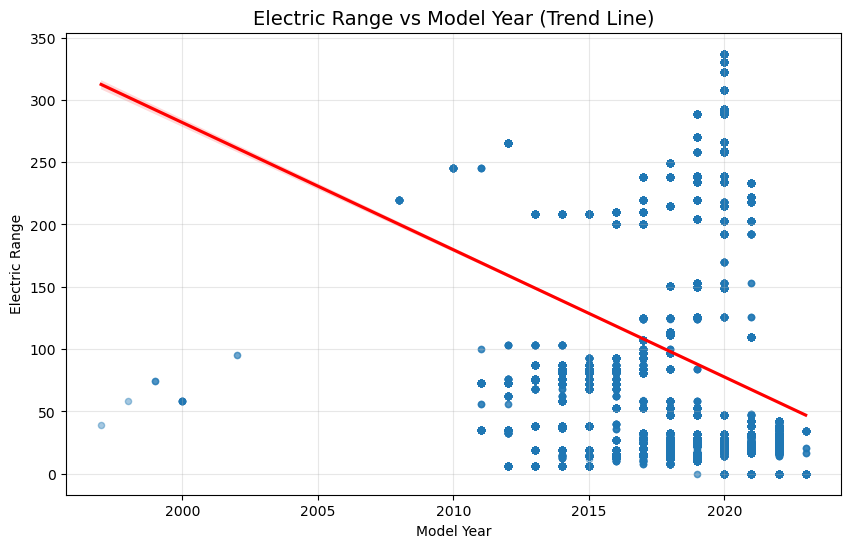

In [6]:
#Range vs Model Year Scatter Plot
#AMAÇ:
#Menzil gelişiminin yıllara göre dağılımını trend çizgisi ile görmek.
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('../data/Electric_Vehicle_Population_Data.csv')

#AMAÇ: Model Year ile Electric Range arasındaki ilişkiyi görmek
#Yıllar ilerledikçe menzil artıyor mu? Dağılım nasıl?
plt.figure(figsize=(10,6))
sns.regplot(data=df, x='Model Year', y='Electric Range',
            scatter_kws={'alpha':0.4, 's':20}, 
            line_kws={'color':'red'})

plt.title("Electric Range vs Model Year (Trend Line)", fontsize=14)
plt.grid(alpha=0.3)
plt.show()


